# Auto_scout project Balint - Part 1: cleaning

In [656]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [657]:
# Load the data
# df = pd.read_json(r'C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind-assignments\Auto_scout\data\scout_car.json', lines=True) # lines=True reads the file as lines of JSON (one JSON object per line)

# Load the data on from relative path
df = pd.read_json('data/scout_car.json', lines = True)

df.shape

(15919, 54)

In [658]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [659]:
df.describe()

price   kW
count  15919.000000  0.0
mean   18019.896727  NaN
std     7386.169409  NaN
min       13.000000  NaN
25%    12850.000000  NaN
50%    16900.000000  NaN
75%    21900.000000  NaN
max    74600.000000  NaN

## Columns to drop straight away/that don't contain useful information for a predictive model

In [660]:
useless_cols = ['url','short_description','description'] # short description could potentially be useful if we can extract general information from it, looks too complex to be useful with some sort of NLP preprocessing
df = df.drop(useless_cols, axis =1)

## Drop columns containing >90% missing values

In [661]:
# Find proportion of missing values for each column
percent_missing = df.isna().sum()/len(df)*100
print(percent_missing)
# Select columns that have >90% missing values, drop these from the data
high_missing = percent_missing[percent_missing >90].index
df = df.drop(high_missing, axis = 1)
df.shape

make_model                         0.000000
body_type                          0.376908
price                              0.000000
vat                               28.349771
km                                 0.000000
registration                       0.000000
prev_owner                        42.892141
kW                               100.000000
hp                                 0.000000
Type                               0.012564
Previous Owners                   41.711163
Next Inspection                   77.793831
Inspection new                    75.299956
Warranty                          34.047365
Full Service                      48.395000
Non-smoking Vehicle               54.915510
null                               0.000000
Make                               0.000000
Model                              0.000000
Offer Number                      19.944720
First Registration                10.032037
Body Color                         3.750236
Paint Type                      

(15919, 44)

In [662]:
df.isna().sum()/len(df)*100


make_model                    0.000000
body_type                     0.376908
price                         0.000000
vat                          28.349771
km                            0.000000
registration                  0.000000
prev_owner                   42.892141
hp                            0.000000
Type                          0.012564
Previous Owners              41.711163
Next Inspection              77.793831
Inspection new               75.299956
Warranty                     34.047365
Full Service                 48.395000
Non-smoking Vehicle          54.915510
null                          0.000000
Make                          0.000000
Model                         0.000000
Offer Number                 19.944720
First Registration           10.032037
Body Color                    3.750236
Paint Type                   36.258559
Body Color Original          23.613292
Upholstery                   23.368302
Body                          0.376908
Nr. of Doors             

## Tidy up column names
- Make them all lower case
- join words using underscore
- clean up col name strings (remove leaading and trailing '\n'))

In [663]:
# Clean up column names
df.columns = df.columns.str.strip().str.lower().str.replace(r'\n','').str.replace('&','_').str.replace(' ','').str.replace('.','')
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration',
       'prev_owner', 'hp', 'type', 'previousowners', 'nextinspection',
       'inspectionnew', 'warranty', 'fullservice', 'non-smokingvehicle',
       'null', 'make', 'model', 'offernumber', 'firstregistration',
       'bodycolor', 'painttype', 'bodycolororiginal', 'upholstery', 'body',
       'nrofdoors', 'nrofseats', 'modelcode', 'gearingtype', 'displacement',
       'cylinders', 'weight', 'drivechain', 'fuel', 'consumption',
       'co2emission', 'emissionclass', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'emissionlabel',
       'gears', 'countryversion'],
      dtype='object')

## Compare 'make_model' with 'make' and 'model' columns

In [664]:
dfmm = df[['make_model', 'make', 'model']]
dfmm.sample(10)

# Should I keep 'make' and 'model' as separate features or just 'make_model'? Want to avoid redundancy/multicolinearity in my training dataset.
print(dfmm.make_model.value_counts(dropna=False)) 

# Final decision: keep 'make_model' and drop 'make' and 'model' - simplifies the feauture set more than onehotencoding both 'make' and 'model'
df = df.drop(['make','model'], axis = 1)


make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64


## Compare and clean/combine prev_owner and previousowners

In [665]:
df[['prev_owner', 'previousowners']].sample(10)
print(df.prev_owner.value_counts(dropna = False))
print(df.previousowners.value_counts(dropna= False))

prev_owner
1 previous owner     8294
None                 6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: count, dtype: int64
previousowners
\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
[\n1\n, \n168 g CO2/km (comb)\n]                                                               13
[\n1\n, \n110 g CO2/km (comb)\n]                                                               12
[\n1\n, \n139 g CO2/km (comb)\n]                                                               12
[\n1\n, \n135 g CO2/km (comb)\n]  

In [666]:
# clean previousowners column 
df['previousowners_cleaned'] = df['previousowners'].str.replace('\n', '')



In [667]:
# clean prev_owner column: remove strings after number, and convert 'None' to np.nan
def clean_prev_owner(value):
    if isinstance(value, str):
        return value.split()[0] # value.split() splits the string into ['1', 'previous', 'owners'], then select first element 
    if value == 'None' or pd.isna(value):
        return np.nan
    return value

df['prev_owner_cleaned'] = df['prev_owner'].apply(clean_prev_owner)
df['prev_owner_cleaned'].value_counts(dropna= False)

prev_owner_cleaned
1      8294
NaN    6828
2       778
3        17
4         2
Name: count, dtype: int64

In [668]:
# Check the NaN discrepancy across the two columns
discrep = df[df['prev_owner_cleaned'] != df['previousowners_cleaned']]
discrep[['prev_owner_cleaned','previousowners_cleaned']].dropna()
# All discrepencies involve an NaN in one of the columns

Empty DataFrame
Columns: [prev_owner_cleaned, previousowners_cleaned]
Index: []

In [669]:
# Have a look at the NaN discrepencies
filtered_df = df[(df['prev_owner_cleaned'].isna() & df['previousowners_cleaned'].notna()) | (df['prev_owner_cleaned'].notna() & df['previousowners_cleaned'].isna())]
filtered_df[['prev_owner_cleaned','previousowners_cleaned']].head(20)

prev_owner_cleaned previousowners_cleaned
47                  NaN                      0
418                 NaN                      0
586                 NaN                      0
648                 NaN                      0
734                 NaN                      0
743                 NaN                      0
869                 NaN                      0
980                 NaN                      0
1080                  1                    NaN
1097                  1                    NaN
1099                NaN                      0
1194                NaN                      0
1598                  1                    NaN
1602                NaN                      0
1625                NaN                      0
1923                NaN                      0
1924                NaN                      0
1932                NaN                      0
1940                  1                    NaN
1945                  1                    NaN

In [670]:
# Some values are NaN in one, and value in the other, and vice versa. Merge so that we keep the value and discard the NaN these instances by using combine_first
# Now merge the two columns together
df['previous_owners_cleaned'] = df['prev_owner_cleaned'].combine_first(df['previousowners_cleaned'])
df['previous_owners_cleaned'].value_counts(dropna = False)


previous_owners_cleaned
1      8294
NaN    6665
2       778
0       163
3        17
4         2
Name: count, dtype: int64

In [671]:
# Drop columns not needed anymore
df = df.drop(['prev_owner_cleaned','previousowners_cleaned','prev_owner', 'previousowners'], axis = 1)

## 'Null' column

In [672]:
print(df['null'].value_counts(dropna = False))
# Drop the 'null' column
df = df.drop('null', axis = 1)

null
[]    15919
Name: count, dtype: int64


In [673]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration', 'hp',
       'type', 'nextinspection', 'inspectionnew', 'warranty', 'fullservice',
       'non-smokingvehicle', 'offernumber', 'firstregistration', 'bodycolor',
       'painttype', 'bodycolororiginal', 'upholstery', 'body', 'nrofdoors',
       'nrofseats', 'modelcode', 'gearingtype', 'displacement', 'cylinders',
       'weight', 'drivechain', 'fuel', 'consumption', 'co2emission',
       'emissionclass', 'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'emissionlabel', 'gears', 'countryversion',
       'previous_owners_cleaned'],
      dtype='object')

## Compare 'co2emission', 'emissionclass', 'emissionlabel' columns

In [674]:
df[['co2emission', 'emissionclass', 'emissionlabel']].head()

co2emission emissionclass    emissionlabel
0   [\n99 g CO2/km (comb)\n]  [\nEuro 6\n]              NaN
1  [\n129 g CO2/km (comb)\n]  [\nEuro 6\n]  [\n4 (Green)\n]
2   [\n99 g CO2/km (comb)\n]  [\nEuro 6\n]  [\n4 (Green)\n]
3   [\n99 g CO2/km (comb)\n]  [\nEuro 6\n]              NaN
4  [\n109 g CO2/km (comb)\n]  [\nEuro 6\n]              NaN

In [675]:
df.co2emission.value_counts()

co2emission
[\n120 g CO2/km (comb)\n]       740
[[], [], []]                    628
[\n99 g CO2/km (comb)\n]        545
[\n97 g CO2/km (comb)\n]        537
[\n104 g CO2/km (comb)\n]       501
[\n102 g CO2/km (comb)\n]       477
[\n103 g CO2/km (comb)\n]       445
[\n114 g CO2/km (comb)\n]       382
[\n124 g CO2/km (comb)\n]       372
[\n108 g CO2/km (comb)\n]       362
[\n107 g CO2/km (comb)\n]       362
[\n119 g CO2/km (comb)\n]       361
[\n106 g CO2/km (comb)\n]       349
[\n128 g CO2/km (comb)\n]       329
[\n126 g CO2/km (comb)\n]       282
[\n85 g CO2/km (comb)\n]        275
[\n118 g CO2/km (comb)\n]       270
[\n110 g CO2/km (comb)\n]       266
[\n127 g CO2/km (comb)\n]       257
[\n117 g CO2/km (comb)\n]       254
[\n111 g CO2/km (comb)\n]       237
[\n113 g CO2/km (comb)\n]       235
[\n109 g CO2/km (comb)\n]       234
[\n139 g CO2/km (comb)\n]       224
[\n140 g CO2/km (comb)\n]       218
[\n129 g CO2/km (comb)\n]       213
[\n105 g CO2/km (comb)\n]       202
[\n135 g CO2/km 

## Co2 emission

In [676]:
def cleann_column(series):
    # Convert the series to string type
    series = series.astype(str)
    # Strip unwanted characters and replace newlines
    return series.str.strip('[]\\n').str.replace('\\n', '', regex=False)

# Apply the cleaning function to each column
df['co2emission'] = cleann_column(df['co2emission'])
df['emissionclass'] = cleann_column(df['emissionclass'])
df['emissionlabel'] = cleann_column(df['emissionlabel'])


In [677]:
df.loc[:9, 'co2emission']

0     '99 g CO2/km (comb)'
1    '129 g CO2/km (comb)'
2     '99 g CO2/km (comb)'
3     '99 g CO2/km (comb)'
4    '109 g CO2/km (comb)'
5     '92 g CO2/km (comb)'
6     '98 g CO2/km (comb)'
7     '97 g CO2/km (comb)'
8     '97 g CO2/km (comb)'
9                        a
Name: co2emission, dtype: object

In [678]:
import re
# Define a function to clean the emission values
def extract_int(value):
    if isinstance(value, str):
        # Remove any unwanted characters and extract the numeric part
        value = re.sub(r'[^\d]', '', value)  # Remove everything except digits
        return int(value) if value else np.nan  # Convert to int or return NaN if empty
    return np.nan

In [679]:
df['co2emission_cleaned_gCO2/km'] = df['co2emission'].str.extract(r'(\d+)')

In [680]:
df.loc[:10, 'co2emission_cleaned_gCO2/km']

0      99
1     129
2      99
3      99
4     109
5      92
6      98
7      97
8      97
9     NaN
10    105
Name: co2emission_cleaned_gCO2/km, dtype: object

## emissionlabel column

In [681]:
df['emissionlabel'].value_counts()
df['emissionlabel'] =df['emissionlabel'].str.strip()
# define values to make np.nan
values_to_nan = ['a', ', [],']

# Replace these values with np.nan
df['emissionlabel'] = df['emissionlabel'].replace(values_to_nan, np.nan) # not sure why this returns string nan, need NaN! 
df['emissionlabel'] = df['emissionlabel'].replace('nan', np.nan)
df['emissionlabel'].value_counts(dropna = False)


emissionlabel
NaN                 11974
'4 (Green)'          3553
'1 (No sticker)'      381
'5 (Blue)'              8
'3 (Yellow)'            2
'2 (Red)'               1
Name: count, dtype: int64

In [682]:
import re
# Define a function to extract the color (I think this is more meaningful than a category number?)
def extract_color(label):
    match = re.search(r'\(([^)]+)\)', label)
    return match.group(1) if match else np.nan

# convert column to string
df['emissionlabel'] = df['emissionlabel'].astype(str)
# Apply the function to the column
df['emissionlabel_cleaned'] = df['emissionlabel'].apply(extract_color)

# Check the cleaned values
print(df['emissionlabel_cleaned'].value_counts(dropna=False))

# Should we convert 'No sticker' to NaN? Depends if 'no sticker' is the same as 'unknown sticker' (assuming NaN is 'unknown sticker')

emissionlabel_cleaned
NaN           11974
Green          3553
No sticker      381
Blue              8
Yellow            2
Red               1
Name: count, dtype: int64


## emissionclass column


In [683]:
# Remove Euro and -TEMP from beginning and end of values
df['emissionclass'] =df['emissionclass'].str.replace('Euro','').str.replace('-TEMP', '').str.replace("'", '').str.strip() # need to remove quote marks too!
# Convert 'a' and ', []' to NaN
values_to_nan = ['a', ', [],']
# Replace these values with np.nan
df['emissionclass_cleaned'] = df['emissionclass'].replace(values_to_nan, np.nan)
df['emissionclass_cleaned'].value_counts(dropna = False)


emissionclass_cleaned
6      10139
NaN     3628
6d      1907
6c       127
5         78
4         40
Name: count, dtype: int64

In [684]:
# Drop emissionclass, emissionlabel, and co2emission columns
df = df.drop(['emissionclass', 'emissionlabel', 'co2emission'], axis = 1)
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'registration', 'hp',
       'type', 'nextinspection', 'inspectionnew', 'warranty', 'fullservice',
       'non-smokingvehicle', 'offernumber', 'firstregistration', 'bodycolor',
       'painttype', 'bodycolororiginal', 'upholstery', 'body', 'nrofdoors',
       'nrofseats', 'modelcode', 'gearingtype', 'displacement', 'cylinders',
       'weight', 'drivechain', 'fuel', 'consumption', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears',
       'countryversion', 'previous_owners_cleaned',
       'co2emission_cleaned_gCO2/km', 'emissionlabel_cleaned',
       'emissionclass_cleaned'],
      dtype='object')

## Compare 'body_type','body' columns

In [685]:
df[['body_type', 'body']].sample(20)

body_type                     body
2740          Sedans         [\n, Sedans, \n]
9204         Compact        [\n, Compact, \n]
8625          Sedans         [\n, Sedans, \n]
8537          Sedans         [\n, Sedans, \n]
9186          Sedans         [\n, Sedans, \n]
14515        Compact        [\n, Compact, \n]
8600          Sedans         [\n, Sedans, \n]
2061         Compact        [\n, Compact, \n]
13198        Compact        [\n, Compact, \n]
1248         Compact        [\n, Compact, \n]
2487          Sedans         [\n, Sedans, \n]
11784  Station wagon  [\n, Station wagon, \n]
990           Sedans         [\n, Sedans, \n]
11730          Other          [\n, Other, \n]
12496  Station wagon  [\n, Station wagon, \n]
3040          Sedans         [\n, Sedans, \n]
12847  Station wagon  [\n, Station wagon, \n]
4700          Sedans         [\n, Sedans, \n]
3856          Sedans         [\n, Sedans, \n]
2521         Compact        [\n, Compact, \n]

In [686]:
# Create a function similar to cleann_column that also removes ','
def clean_column(series):
    series = series.astype(str)
    # Strip unwanted characters and replace newlines
    return series.str.split(',').str[1].str.strip(" \n[]'")

In [687]:
# body_type and 'body' look very similar, clean 'body' and then check
df['body_cleaned'] = clean_column(df['body'])
df['body_cleaned'].value_counts(dropna =False)

# Drop original body column
df = df.drop('body', axis = 1)

In [688]:
# Check body_type
df['body_type'].value_counts(dropna = False)
# body_type identical to body_cleaned, so keep body_cleaned
df = df.drop('body_type', axis = 1)

## Compare'bodycolor', 'bodycolororiginal' columns

In [689]:
# Clean the bodycolor feature
df['bodycolor_cleaned'] = clean_column(df['bodycolor'])
df['bodycolor_cleaned'].value_counts(dropna=False)
df = df.drop('bodycolor', axis = 1)

In [690]:
# Drop the bodycolororiginal column - lots of NaNs and useful information all in 'bodycolor_cleaned' variable now
df = df.drop('bodycolororiginal', axis = 1)

In [691]:
df.columns

Index(['make_model', 'price', 'vat', 'km', 'registration', 'hp', 'type',
       'nextinspection', 'inspectionnew', 'warranty', 'fullservice',
       'non-smokingvehicle', 'offernumber', 'firstregistration', 'painttype',
       'upholstery', 'nrofdoors', 'nrofseats', 'modelcode', 'gearingtype',
       'displacement', 'cylinders', 'weight', 'drivechain', 'fuel',
       'consumption', 'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'gears', 'countryversion', 'previous_owners_cleaned',
       'co2emission_cleaned_gCO2/km', 'emissionlabel_cleaned',
       'emissionclass_cleaned', 'body_cleaned', 'bodycolor_cleaned'],
      dtype='object')

** Look at price (target variable?) and vat columns


<Axes: ylabel='price'>

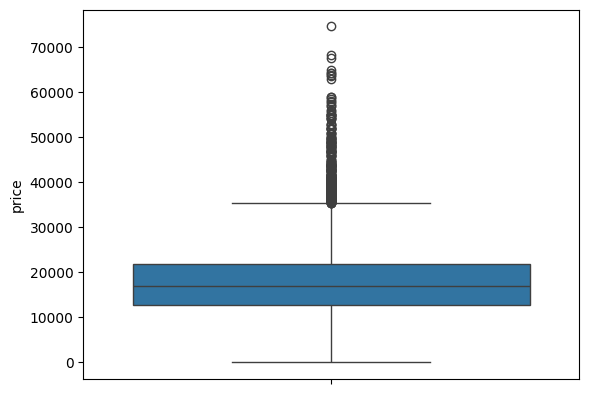

In [692]:
sns.boxplot(df['price'])

In [693]:
df['vat'].value_counts(dropna= False)

vat
VAT deductible      10980
None                 4513
Price negotiable      426
Name: count, dtype: int64

## km column

In [694]:
df['km'].value_counts(dropna= False)

km
10 km         1045
- km          1024
1 km           367
5 km           170
50 km          148
100 km         139
15 km          109
5,000 km       104
20 km           61
3,000 km        58
12 km           56
8,000 km        49
45,000 km       48
30,000 km       47
25,000 km       47
10,000 km       47
1,000 km        46
18,000 km       46
35,000 km       44
19,000 km       44
150 km          43
15,000 km       43
70,000 km       43
6,000 km        41
20,000 km       40
40,000 km       40
7 km            38
9,000 km        38
80,000 km       37
50,000 km       36
11 km           35
500 km          35
16,000 km       34
17,000 km       34
55,000 km       34
11,000 km       33
3 km            33
60,000 km       32
28,000 km       32
8 km            31
24,000 km       31
29,000 km       31
2,500 km        31
100,000 km      31
89,000 km       30
22,000 km       30
3,500 km        29
47,000 km       29
26,000 km       29
3,898 km        28
21,379 km       28
12,000 km       27
31,356 km

In [695]:
# drop 'km' and convert to integer
df['km'] = df['km'].str.replace(' km','').str.replace(',','').str.replace('-','')
df['km_cleaned'] = pd.to_numeric(df['km']).astype('Int64')
df['km_cleaned'].sample(10)

df = df.drop('km', axis = 1)


In [696]:
## VAT column

In [697]:
df['vat'].value_counts(dropna = False)

vat
VAT deductible      10980
None                 4513
Price negotiable      426
Name: count, dtype: int64

In [698]:
# Convert 'None' to np.NaN
df['vat_cleaned'] = df['vat'].replace([None, 'None', ' None', ' None '], np.nan)
df = df.drop('vat', axis = 1)

## Registration column

In [699]:
df['registration'].value_counts(dropna = False)
# Convert -/- to np.nan
df['registration'] = df['registration'].replace('-/-', np.nan)

In [700]:
# convert feature to datetime data type
df['registration_cleaned'] = pd.to_datetime(df['registration'])
df = df.drop('registration', axis = 1)

C:\Users\BalintStewart\AppData\Local\Temp\ipykernel_16092\382052923.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['registration_cleaned'] = pd.to_datetime(df['registration'])


In [701]:
#compare with firstregistration column
df[['firstregistration', 'registration_cleaned']].sample(20)


firstregistration registration_cleaned
8871     [\n, 2017, \n]           2017-07-01
41       [\n, 2016, \n]           2016-02-01
11036    [\n, 2016, \n]           2016-04-01
8172     [\n, 2019, \n]           2019-04-01
6095     [\n, 2016, \n]           2016-02-01
8893     [\n, 2017, \n]           2017-06-01
15128    [\n, 2017, \n]           2017-02-01
5373     [\n, 2019, \n]           2019-04-01
2060     [\n, 2019, \n]           2019-01-01
15065    [\n, 2016, \n]           2016-08-01
1188                NaN                  NaT
5140                NaN                  NaT
10455    [\n, 2019, \n]           2019-05-01
890      [\n, 2017, \n]           2017-01-01
5868     [\n, 2016, \n]           2016-05-01
9116     [\n, 2017, \n]           2017-04-01
3178     [\n, 2016, \n]           2016-02-01
10308    [\n, 2019, \n]           2019-03-01
11620    [\n, 2017, \n]           2017-06-01
10348    [\n, 2019, \n]           2019-06-01

In [702]:
# registration_cleaned has more info that firstregistration, just make sure year counts are same across both
df['registration_cleaned'].dt.year.value_counts().sort_index()

registration_cleaned
2016.0    3674
2017.0    3273
2018.0    4522
2019.0    2853
Name: count, dtype: int64

In [703]:
df = df.drop('firstregistration', axis = 1)

# hp column

In [704]:
df.hp.value_counts(dropna = False)

hp
85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
52 kW       22
82 kW       22
78 kW       20
1 kW        20
146 kW      18
294 kW      18
141 kW      16
57 kW       10
120 kW       8
104 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
76 kW        4
65 kW        4
90 kW        4
93 kW        3
149 kW       3
80 kW        3
98 kW        3
168 kW       3
86 kW        2
140 kW       2
270 kW       2
228 kW       2
150 kW       2
127 kW       2
143 kW       2
63 kW        2
40 kW        2
167 kW       2
53 kW  

In [705]:
#drop kW, add unit to column name and make into Int64 dtype
df['hp_kW_cleaned'] = df['hp'].str.replace('kW', '').str.replace('- ', '')
df['hp_kW_cleaned'] = pd.to_numeric(df['hp_kW_cleaned']).astype('Int64')
# Replace pd.NA with np.nan
df['hp_kW_cleaned'] = df['hp_kW_cleaned'].replace('<NA>', np.nan)
df = df.drop('hp', axis = 1)

In [706]:
df.columns

Index(['make_model', 'price', 'type', 'nextinspection', 'inspectionnew',
       'warranty', 'fullservice', 'non-smokingvehicle', 'offernumber',
       'painttype', 'upholstery', 'nrofdoors', 'nrofseats', 'modelcode',
       'gearingtype', 'displacement', 'cylinders', 'weight', 'drivechain',
       'fuel', 'consumption', 'comfort_convenience', 'entertainment_media',
       'extras', 'safety_security', 'gears', 'countryversion',
       'previous_owners_cleaned', 'co2emission_cleaned_gCO2/km',
       'emissionlabel_cleaned', 'emissionclass_cleaned', 'body_cleaned',
       'bodycolor_cleaned', 'km_cleaned', 'vat_cleaned',
       'registration_cleaned', 'hp_kW_cleaned'],
      dtype='object')

## nextinspection and inspectionnew columns

In [707]:
df['nextinspection'].value_counts()

nextinspection
\n04/2022\n                                                                                        62
\n03/2021\n                                                                                        38
\n03/2022\n                                                                                        36
\n06/2021\n                                                                                        34
\n01/2022\n                                                                                        32
\n04/2021\n                                                                                        29
[\n06/2021\n, \nEuro 6\n]                                                                          29
[\n08/2021\n, \n135 g CO2/km (comb)\n]                                                             28
\n05/2021\n                                                                                        27
\n05/2022\n                                                        

In [708]:
# Extract MM/YYYY pattern
df['nextinspection_cleaned'] = df['nextinspection'].str.extract(r'(\d{2}/\d{4})')
# Convert to datetime
df['nextinspection_cleaned'] = pd.to_datetime(df['nextinspection_cleaned'], format='%m/%Y', errors='coerce')
df.nextinspection_cleaned.value_counts(dropna = False) # Looks like quite a lot of NaTs?
df = df.drop('nextinspection', axis = 1)


In [709]:
df.inspectionnew.value_counts(dropna=False)

inspectionnew
NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
[\nYes\n, \nEuro 6d-TEMP\n]                                                                      134
[\nYes\n, \n97 g CO2/km (comb)\n]                                                                 89
[\nYes\n, \n0 kWh/100 km (comb)\n]                                                                86
[\nYes\n, \n119 g CO2/km (comb)\n]                                                                84
[\nYes\n, \n128 g CO2/km (comb)\n]                                           

In [710]:
# Function to clean the column
def clean_data(val):
    if isinstance(val, list):
        return val[0].strip()  # Get the first item and strip any whitespace/newlines
    elif isinstance(val, str):
        return val.strip()  # Strip any whitespace/newlines
    else:
        return np.nan  # Preserve NaN values

# Apply the cleaning function to the column
df['inspectionnew_cleaned'] = df['inspectionnew'].apply(clean_data)

In [711]:
df.inspectionnew_cleaned.value_counts(dropna=False)

inspectionnew_cleaned
NaN    11987
Yes     3932
Name: count, dtype: int64

In [712]:
# drop old inspectionnew column
df.drop('inspectionnew', axis = 1, inplace= True)

## Type column

In [713]:
print(df.type.value_counts(dropna = False))
# type column appears to have two pieces of info - whether the car is new or used, and what fuel it uses. Both useful for our model, so split into two columns: 'type' and 'fuel'
# Create new 'type_cleaned' containing element [1] from each row
df['type_cleaned'] = df['type'].apply(lambda x: x[1] if isinstance(x, list) else np.nan)

type
[, Used, , Diesel (Particulate Filter)]                                                                                                       3475
[, Used, , Diesel]                                                                                                                            2516
[, Used, , Gasoline]                                                                                                                          2367
[, Used, , Super 95]                                                                                                                          1818
[, Pre-registered, , Super 95]                                                                                                                 500
[, New, , Super 95]                                                                                                                            497
[, Employee's car, , Diesel (Particulate Filter)]                                                                

In [714]:
# Create new column 'fuel' containing element[3] from each list 
df['fuel'] = df['type'].apply(lambda x: x[3] if isinstance(x, list) else np.nan)
# Temporarily set display option to show all rows
pd.set_option('display.max_rows', None)
df['fuel'].value_counts(dropna = False)


fuel
Diesel (Particulate Filter)                                                                                                       4315
Super 95                                                                                                                          3338
Gasoline                                                                                                                          3175
Diesel                                                                                                                            2982
Super 95 / Regular/Benzine 91                                                                                                      424
Regular/Benzine 91                                                                                                                 354
Super E10 95                                                                                                                       331
Super 95 (Particulate Filter)                     

In [715]:
# Consolidate the categroies into fewer categoris, draw out 2 additional columns dependning on parituculate filfer or multiple_fuel
def clean_fuel(fuel_val):
    fuel_val = str(fuel_val).lower()
    particulate_filter = 1 if 'particulate filter' in fuel_val else 0
    multiple_fuel = 1 if ('/' in fuel_val or '&' in fuel_val) else 0
    # consolidate fuel categories
    if 'diesel' in fuel_val:
        fuel_type = 'diesel'
    elif 'super 95' in fuel_val:
        fuel_type = 'super95'
    elif 'gasoline' in fuel_val or 'benzine' in fuel_val:
        fuel_type = 'gasoline'
    else:
        fuel_type = 'other'
    return pd.Series([fuel_type, particulate_filter, multiple_fuel])

# Apply the clenaing function to create the new columns
df[['fuel_cleaned', 'particulate_filter', 'multiple_fuel']] = df['fuel'].apply(clean_fuel)

df.fuel_cleaned.value_counts()

fuel_cleaned
diesel      7298
super95     4466
gasoline    3731
other        424
Name: count, dtype: int64

In [716]:
df.multiple_fuel.value_counts()

multiple_fuel
0    14574
1     1345
Name: count, dtype: int64

In [579]:
# Drop 'type' column and 'fuel' column
df = df.drop(['type','fuel'], axis = 1)

In [580]:
df.columns

Index(['make_model', 'price', 'warranty', 'fullservice', 'non-smokingvehicle',
       'offernumber', 'painttype', 'upholstery', 'nrofdoors', 'nrofseats',
       'modelcode', 'gearingtype', 'displacement', 'cylinders', 'weight',
       'drivechain', 'consumption', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears',
       'countryversion', 'previous_owners_cleaned',
       'co2emission_cleaned_gCO2/km', 'emissionlabel_cleaned',
       'emissionclass_cleaned', 'body_cleaned', 'bodycolor_cleaned',
       'km_cleaned', 'vat_cleaned', 'registration_cleaned', 'hp_kW_cleaned',
       'nextinspection_cleaned', 'inspectionnew_cleaned', 'type_cleaned',
       'fuel_cleaned', 'particulate_filter', 'multiple_fuel'],
      dtype='object')

## offernumber column

In [581]:
df.offernumber.value_counts(dropna = False)

offernumber
NaN                                                        3175
[\nXT61649\n]                                                27
[\nHM53619\n]                                                27
[\nXJ38068\n]                                                27
[\nJV03654\n]                                                27
[\nAK13780\n]                                                27
[\nLT67679\n]                                                27
[\nTA76392\n]                                                27
[\nTP62881\n]                                                27
[\nUN89904\n]                                                27
[\nBA804713\n]                                               19
[\nBR727019\n]                                               19
[\nBA863083\n]                                               19
[\nBA344433\n]                                               19
[\nBA375295\n]                                               18
[\nREF_100733\n]            

In [582]:
# convert to string
df['offernumber_cleaned'] = df['offernumber'].astype(str)
df['offernumber_cleaned'] = cleann_column(df['offernumber_cleaned']).str.replace("'", '')
# Convert all 'a' values to np.nan
df['offernumber_cleaned'] = df['offernumber_cleaned'].replace('a', np.nan)
df['offernumber_cleaned'].value_counts(dropna = False)

# Drop origianl offernumber column
df = df.drop('offernumber', axis = 1)



## Warranty column

In [583]:
df.warranty.value_counts(dropna = False)

warranty
NaN                                                                                                  5420
[\n, \n, \nEuro 6\n]                                                                                 1868
\n12 months\n                                                                                        1177
\n                                                                                                    979
\n24 months\n                                                                                         566
[\n, \n, \n4 (Green)\n]                                                                               517
[\n12 months\n, \nEuro 6\n]                                                                           425
[\n, \n]                                                                                              364
[\n, \n, \nEuro 6d-TEMP\n]                                                                            362
[\n12 months\n]                      

In [584]:
def extract_warranty_months(warranty_val):
    # Initialize the default value
    warranty_months = np.nan

     # If the value is a list or array
    if isinstance(warranty_val, (list, np.ndarray)):
        # Check if all elements are NaN
        if all(pd.isnull(warranty_val)):
            return warranty_months
        # Remove NaN elements and flatten the list into a string
        warranty_str = ' '.join([str(item) for item in warranty_val if pd.notnull(item)])
        if not warranty_str:
            return warranty_months
    else:
        # If it's a scalar value
        if pd.isnull(warranty_val):
            return warranty_months
        warranty_str = str(warranty_val)
    # Remove newline characters and extra spaces
    warranty_str = warranty_str.replace('\n', ' ').strip()

    # Use regular expression to find the warranty duration in months
    match = re.search(r'(\d+)\s*months', warranty_str, re.IGNORECASE)
    if match:
        warranty_months = int(match.group(1))

    return warranty_months

df['warranty_months'] = df['warranty'].apply(extract_warranty_months)


In [585]:
# Compare new cleaned column with old column
print(df[['warranty', 'warranty_months']].head(20))
df.warranty_months.value_counts(dropna = False)

                                   warranty  warranty_months
0                   [\n, \n, \n4 (Green)\n]              NaN
1                                       NaN              NaN
2          [\n, \n, \n99 g CO2/km (comb)\n]              NaN
3                                       NaN              NaN
4                      [\n, \n, \nEuro 6\n]              NaN
5                                       NaN              NaN
6                                       NaN              NaN
7                      [\n, \n, \nEuro 6\n]              NaN
8               [\n12 months\n, \nEuro 6\n]             12.0
9                              \n3 months\n              3.0
10                                      NaN              NaN
11                     [\n, \n, \nEuro 6\n]              NaN
12                     [\n, \n, \nEuro 6\n]              NaN
13                            \n12 months\n             12.0
14                                      NaN              NaN
15              [\n12 mo

warranty_months
NaN     11066
12.0     2594
24.0     1118
60.0      401
36.0      279
48.0      149
6.0       125
72.0       59
3.0        33
23.0       11
18.0       10
20.0        7
25.0        6
2.0         5
50.0        4
26.0        4
16.0        4
19.0        3
34.0        3
4.0         3
1.0         3
13.0        3
22.0        2
28.0        2
11.0        2
46.0        2
9.0         2
21.0        2
14.0        2
45.0        2
17.0        2
47.0        1
49.0        1
56.0        1
10.0        1
7.0         1
8.0         1
15.0        1
65.0        1
33.0        1
40.0        1
30.0        1
Name: count, dtype: int64

In [586]:
# Drop old warranty column
df = df.drop('warranty', axis = 1)

## fullservice column and non-smokingvehicle

In [587]:
df[['fullservice', 'non-smokingvehicle', 'emissionlabel_cleaned', 'emissionclass_cleaned','co2emission_cleaned_gCO2/km']].sample(20)

fullservice                 non-smokingvehicle  \
8796                       NaN                                NaN   
14621     [\n, \n, \nEuro 6\n]                           [\n, \n]   
15052                 [\n, \n]                           [\n, \n]   
6755                        \n                                NaN   
4116                       NaN  [\n, \n, \n108 g CO2/km (comb)\n]   
8673      [\n, \n, \nEuro 6\n]                                NaN   
7919                       NaN                                NaN   
15106  [\n, \n, \n4 (Green)\n]                           [\n, \n]   
10582     [\n, \n, \nEuro 6\n]                           [\n, \n]   
2999      [\n, \n, \nEuro 6\n]            [\n, \n, \n4 (Green)\n]   
6026                       NaN                                NaN   
13388                      NaN                                NaN   
15016                      NaN  [\n, \n, \n153 g CO2/km (comb)\n]   
6936                  [\n, \n]                                NaN   
6499      [\n, \n, \nEuro 6\n]                           [\n, \n]   
9164                       NaN  [\n, \n, \n124 g CO2/km (comb)\n]   
1058   [\n, \n, \n4 (Green)\n]                                NaN   
8458                       NaN                                NaN   
6708                       NaN                                NaN   
10963                      NaN                                NaN   

      emissionlabel_cleaned emissionclass_cleaned co2emission_cleaned_gCO2/km  
8796                    NaN                   NaN                         NaN  
14621                   NaN                     6                          92  
15052                   NaN                     6                         120  
6755                    NaN                   NaN                         102  
4116                    NaN                     6                         108  
8673                    NaN                     6                         126  
7919                    NaN                     6                         NaN  
15106                   NaN                     6                         123  
10582                   NaN                     6                         129  
2999                    NaN                   NaN                          99  
6026                    NaN                     6                         122  
13388                   NaN                   NaN                         NaN  
15016                 Green                     6                         153  
6936                    NaN                     6                          97  
6499                    NaN                     6                          90  
9164                    NaN                     6                         124  
1058                    NaN                     6                         102  
8458                    NaN                     6                         NaN  
6708                    NaN                     6                         122  
10963                   NaN                     6                          99

In [588]:
# fullservice and non-smokingvehicle doesn't have any new info, drop
df = df.drop(['fullservice','non-smokingvehicle'], axis = 1)

In [589]:
df.columns

Index(['make_model', 'price', 'painttype', 'upholstery', 'nrofdoors',
       'nrofseats', 'modelcode', 'gearingtype', 'displacement', 'cylinders',
       'weight', 'drivechain', 'consumption', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears',
       'countryversion', 'previous_owners_cleaned',
       'co2emission_cleaned_gCO2/km', 'emissionlabel_cleaned',
       'emissionclass_cleaned', 'body_cleaned', 'bodycolor_cleaned',
       'km_cleaned', 'vat_cleaned', 'registration_cleaned', 'hp_kW_cleaned',
       'nextinspection_cleaned', 'inspectionnew_cleaned', 'type_cleaned',
       'fuel_cleaned', 'particulate_filter', 'multiple_fuel',
       'offernumber_cleaned', 'warranty_months'],
      dtype='object')

##

## painttype column

In [590]:
df.painttype.value_counts(dropna = False)

painttype
[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: count, dtype: int64

In [591]:
def clean_painttype(value):
    if isinstance(value, list):
        # Extract the string from the list
        value = value[0]
    if isinstance(value, str):
        # Remove square brackets and newlines
        value = value.strip('[]').replace('\n', '').strip()
        return value
    else:
        # Return NaN for non-string, non-list values
        return np.nan

# Apply the function to the 'painttype' column
df['painttype_cleaned'] = df['painttype'].apply(clean_painttype)

In [592]:
df['painttype_cleaned'].value_counts()

# Drop original painttype column
df = df.drop('painttype', axis = 1)

## upholstery

In [593]:
df.upholstery.value_counts(dropna = False)

upholstery
[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nPart leather, Grey\n]      116
[\nFull leather, Brown\n]     116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\n

In [594]:
def clean_upholstery(value):
    # initialize default values for 
    material = np.nan
    colour = np.nan
    # Handle lists
    if isinstance(value, list):
       value = value[0]
# Handle strings
    if isinstance(value, str):
        value = value.strip('[]').replace('\n', '').strip()
        # Split by comma
        parts = [part.strip() for part in value.split(',')]
         # Assign material and colour based on the number of parts
        if len(parts) == 2:
            material, colour = parts
        elif len(parts) == 1:
            # Determine if the single part is material or colour
            if parts[0].lower() in ['cloth', 'part leather', 'full leather', 'alcantara', 'velour', 'other']:
                material = parts[0]
            else:
                colour = parts[0]
        else:
            # Handle unexpected cases
            pass  # material and colour remain NaN
    else:
        # For non-string, non-list values (e.g., NaN, integers), return NaN
        pass  # material and colour remain NaN
    
    return pd.Series([material, colour])

# Apply the function to create new columns
df[['interior_material', 'interior_colour']] = df['upholstery'].apply(clean_upholstery)


In [595]:
# compare the cols
df[['interior_material', 'interior_colour','upholstery']].sample(20)

interior_material interior_colour                 upholstery
5319                NaN             NaN                        NaN
4078              Cloth           Black         [\nCloth, Black\n]
12308             Cloth           Black         [\nCloth, Black\n]
7695              Cloth           Black         [\nCloth, Black\n]
2877                NaN            Grey                 [\nGrey\n]
13306             Cloth           Black         [\nCloth, Black\n]
5258              Cloth           Black         [\nCloth, Black\n]
7930              Cloth             NaN                [\nCloth\n]
9124              Cloth           Black         [\nCloth, Black\n]
3932                NaN             NaN                        NaN
613                 NaN             NaN                        NaN
13431               NaN             NaN                        NaN
1632                NaN             NaN                        NaN
5350              Cloth             NaN                [\nCloth\n]
6199                NaN             NaN                        NaN
4421                NaN             NaN                        NaN
5949              Cloth           Black         [\nCloth, Black\n]
9626              Cloth             NaN                [\nCloth\n]
13679             Cloth           Other         [\nCloth, Other\n]
15625      Part leather           Brown  [\nPart leather, Brown\n]

In [596]:
# Look at value_counts
print(df['interior_colour'].value_counts(dropna= False))
df['interior_material'].value_counts(dropna= False)

# drop upholstery column
df = df.drop('upholstery', axis = 1)

interior_colour
Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: count, dtype: int64


In [597]:
# Reduce complexity of the column interior_colour by making all colours with <500 counts 'Other'


## nrofdoors column

In [598]:
df.nrofdoors.value_counts(dropna = False)

nrofdoors
[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n1\n]        1
[\n7\n]        1
Name: count, dtype: int64

In [599]:
def clean_nrofdoors(value):
    if isinstance(value, list):
        value = value[0]
    if isinstance(value, str):
        value = value.strip('[]').replace('\n', '').strip()
        return value
    else:
        # Return NaN for non-string, non-list values
        return np.nan

df['nrofdoors_cleaned'] = df['nrofdoors'].apply(clean_nrofdoors)
df.nrofdoors_cleaned.value_counts(dropna = False)

#Convert 'nrofdoors_cleaned' to numeric values
df['nrofdoors_cleaned'] = pd.to_numeric(df['nrofdoors_cleaned'], errors='coerce').astype('Int64')

In [600]:
df[['nrofdoors_cleaned', 'nrofdoors']].sample(20)

nrofdoors_cleaned nrofdoors
9829                   2   [\n2\n]
8337                   3   [\n3\n]
12460                  4   [\n4\n]
4953                   5   [\n5\n]
10056                  4   [\n4\n]
13632               <NA>       NaN
11734                  5   [\n5\n]
12839                  5   [\n5\n]
14661                  5   [\n5\n]
1491                   5   [\n5\n]
12135                  5   [\n5\n]
14221                  5   [\n5\n]
9506                   4   [\n4\n]
14075                  5   [\n5\n]
4396                   5   [\n5\n]
11497                  5   [\n5\n]
11835                  5   [\n5\n]
14061                  5   [\n5\n]
11566                  5   [\n5\n]
4832                   4   [\n4\n]

## nrofseats column

In [601]:
df.nrofseats.value_counts(dropna = False)

nrofseats
[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: count, dtype: int64

In [602]:
# Can reuse the function I made for nrof doors here
df['nrofseats_cleaned'] = df['nrofseats'].apply(clean_nrofdoors)

#Convert 'nrofseats_cleaned' to numeric values
df['nrofseats_cleaned'] = pd.to_numeric(df['nrofseats_cleaned'], errors='coerce')
df.nrofseats_cleaned.value_counts(dropna = False)

nrofseats_cleaned
5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: count, dtype: int64

In [603]:
# drop original nrofdoors and nrofseats columns
df = df.drop(['nrofdoors','nrofseats'], axis = 1)


## modelcode column

In [604]:
df['modelcode'].value_counts(dropna = False)

modelcode
NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
[\n1844/ADJ\n]      175
[\n0588/BDF\n]      175
[\n0588/BCV\n]      139
[\n3333/BAJ\n]      122
[\n3333/BEF\n]      118
[\n0588/AYB\n]      117
[\n0035/BEL\n]      111
[\n0588/BLL\n]      109
[\n3333/BHJ\n]       87
[\n0588/BLH\n]       86
[\n0035/BFM\n]       84
[\n0035/BKN\n]       84
[\n0588/AWJ\n]       82
[\n3333/BJR\n]       79
[\n0588/BHM\n]       79
[\n0035/BFI\n]       76
[\n0035/BKQ\n]       69
[\n0588/BDC\n]       67
[\n0035/BKU\n]       62
[\n0035/BHM\n]       60
[\n0035/BBZ\n]       59
[\n3333/BDQ\n]       59
[\n0588/BNN\n]       58
[\n0588/BLG\n]       53
[\n0588/BDG\n]       52
[\n3333/BEG\n]       50
[\n0035/BHQ\n]       48
[\n0035/BCJ\n]       46
[\n0035/BFP\n]       44
[\n1844/AJG\n]       43
[\n0035/BHP\n]       43
[\n0035/BHY\n]       41
[\n0588/BHL\n]       40
[\n0035/BFJ\n]       39
[\n0035/BCL\n]       38
[\n0588/BCZ\n]       35
[\n058

In [605]:
# Can reuse the function I made for nrof doors here
df['modelcode_cleaned'] = df['modelcode'].apply(clean_nrofdoors)
df.modelcode_cleaned.value_counts(dropna = False)
#drop original modelcode column
df = df.drop('modelcode', axis = 1)

In [606]:
df.gearingtype.value_counts(dropna = False)

gearingtype
[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: count, dtype: int64

In [607]:
df['gearingtype_cleaned'] = df['gearingtype'].str[1]
df['gearingtype_cleaned'].value_counts(dropna = False)

# drop gearingtype column
df = df.drop('gearingtype', axis = 1)

## Gears column

In [608]:
df.gears.value_counts(dropna = False)

gears
[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n4\n]        2
[\n3\n]        2
[\n2\n]        1
[\n50\n]       1
Name: count, dtype: int64

In [609]:
# Can reuse the function I made for nrof doors here
df['gears_cleaned'] = df['gears'].apply(clean_nrofdoors)

#Convert 'nrofseats_cleaned' to numeric values
df['gears_cleaned'] = pd.to_numeric(df['gears_cleaned'], errors='coerce')
df.gears_cleaned.value_counts(dropna = False)
# 50 gears looks like an odd outlier, wait for dealing with this for now (until outlier handling section of project)
df = df.drop('gears', axis = 1)

In [610]:
df[['displacement', 'cylinders', 'weight',
       'drivechain', 'consumption', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'countryversion']].sample(5)

displacement cylinders          weight   drivechain  \
10909             NaN       NaN             NaN          NaN   
12875  [\n1,600 cc\n]   [\n4\n]             NaN  [\nfront\n]   
8555   [\n1,398 cc\n]   [\n4\n]             NaN  [\nfront\n]   
15379  [\n1,598 cc\n]   [\n4\n]  [\n1,761 kg\n]          NaN   
15547  [\n1,798 cc\n]       NaN             NaN  [\nfront\n]   

                                             consumption  \
10909                                                NaN   
12875  [[6.3 l/100 km (comb)], [8 l/100 km (city)], [...   
8555   [[5.9 l/100 km (comb)], [7.9 l/100 km (city)],...   
15379  [[4.4 l/100 km (comb)], [5.1 l/100 km (city)],...   
15547  [[6.8 l/100 km (comb)], [8.7 l/100 km (city)],...   

                                     comfort_convenience  \
10909                                                NaN   
12875  [Air conditioning, Armrest, Automatic climate ...   
8555   [Air conditioning, Cruise control, Heated stee...   
15379  [Armrest, Cruise control, Electrical side mirr...   
15547  [Air conditioning, Automatic climate control, ...   

                                     entertainment_media  \
10909                                                NaN   
12875  [Bluetooth, Digital radio, Hands-free equipmen...   
8555   [Bluetooth, Hands-free equipment, MP3, On-boar...   
15379  [Bluetooth, Digital radio, Hands-free equipmen...   
15547  [Bluetooth, CD player, Hands-free equipment, R...   

                                                  extras  \
10909                                                NaN   
12875  [Alloy wheels, Roof rack, Sport package, Sport...   
8555                 [Alloy wheels, Catalytic Converter]   
15379        [Alloy wheels, Touch screen, Voice Control]   
15547                                     [Alloy wheels]   

                                         safety_security     countryversion  
10909                                                NaN                NaN  
12875  [ABS, Adaptive headlights, Blind spot monitor,...  [\nNetherlands\n]  
8555   [ABS, Central door lock, Daytime running light...      [\nGermany\n]  
15379  [ABS, Central door lock, Daytime running light...      [\nGermany\n]  
15547  [ABS, Adaptive headlights, Central door lock, ...                NaN

## cylinders column

In [611]:
# Can reuse the function I made for nrof doors here
df['cylinders_cleaned'] = df['cylinders'].apply(clean_nrofdoors)

#Convert 'nrofseats_cleaned' to numeric values
df['cylinders_cleaned'] = pd.to_numeric(df['cylinders_cleaned'], errors='coerce')
df.cylinders_cleaned.value_counts(dropna = False)

df = df.drop('cylinders', axis = 1)


## drivechain column


In [612]:
# Can reuse the function I made for nrof doors here
df['drivechain_cleaned'] = df['drivechain'].apply(clean_nrofdoors)
df['drivechain_cleaned'].value_counts(dropna = False)

drivechain_cleaned
front    8886
NaN      6858
4WD       171
rear        4
Name: count, dtype: int64

In [613]:
# drop original drivechain column
df.drop('drivechain', axis = 1, inplace = True)

## weight column

In [614]:
df.weight.value_counts(dropna = False)

weight
NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
[\n1,135 kg\n]     213
[\n1,199 kg\n]     205
[\n1,734 kg\n]     170
[\n1,180 kg\n]     168
[\n1,503 kg\n]     165
[\n1,350 kg\n]     155
[\n1,355 kg\n]     135
[\n1,260 kg\n]     127
[\n1,275 kg\n]     112
[\n1,278 kg\n]     110
[\n1,487 kg\n]     109
[\n1,425 kg\n]     109
[\n1,255 kg\n]     108
[\n1,200 kg\n]     107
[\n1,522 kg\n]     103
[\n1,273 kg\n]     103
[\n1,280 kg\n]     102
[\n1,403 kg\n]      91
[\n1,120 kg\n]      90
[\n1,659 kg\n]      89
[\n1,195 kg\n]      89
[\n1,701 kg\n]      87
[\n1,250 kg\n]      84
[\n1,441 kg\n]      82
[\n1,285 kg\n]      80
[\n1,308 kg\n]      80
[\n1,110 kg\n]      75
[\n1,613 kg\n]      75
[\n1,279 kg\n]      72
[\n1,364 kg\n]      70
[\n1,345 kg\n]      67
[\n1,733 kg\n]      65
[\n1,071 kg\n]      64
[\n1,141 kg\n]      64
[\n1,685 kg\n]      64
[\n1,325 kg\n]      64
[\n1,230 kg\n]      63
[\n1,845 kg\n]      56
[\n1

In [615]:
df['weight_cleaned_kg'] = df['weight'].apply(clean_nrofdoors).str.replace('kg','').str.replace(',','').str.strip()
df['weight_cleaned_kg'] = pd.to_numeric(df['weight_cleaned_kg'])
df['weight_cleaned_kg'].value_counts(dropna=False)

weight_cleaned_kg
NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
1135.0     213
1199.0     205
1734.0     170
1180.0     168
1503.0     165
1350.0     155
1355.0     135
1260.0     127
1275.0     112
1278.0     110
1487.0     109
1425.0     109
1255.0     108
1200.0     107
1522.0     103
1273.0     103
1280.0     102
1403.0      91
1120.0      90
1659.0      89
1195.0      89
1701.0      87
1250.0      84
1441.0      82
1285.0      80
1308.0      80
1110.0      75
1613.0      75
1279.0      72
1364.0      70
1345.0      67
1733.0      65
1071.0      64
1141.0      64
1685.0      64
1325.0      64
1230.0      63
1845.0      56
1090.0      54
1052.0      53
1154.0      52
1664.0      52
1513.0      51
1065.0      50
1237.0      49
1119.0      46
1205.0      46
1440.0      46
1088.0      46
1265.0      45
1395.0      44
1666.0      43
1209.0      43
1585.0      43
1365.0      42
1162.0      42
1134.0      42
1248.0      40
1288.0      40
1393.0      40
1087.0 

In [616]:
df = df.drop('weight', axis= 1)

## displacement column

In [617]:
df.displacement.value_counts(dropna= False)

displacement
[\n1,598 cc\n]     4761
[\n999 cc\n]       2438
[\n1,398 cc\n]     1314
[\n1,399 cc\n]      749
[\n1,229 cc\n]      677
[\n1,956 cc\n]      670
[\n1,461 cc\n]      595
[\n1,490 cc\n]      559
NaN                 496
[\n1,422 cc\n]      467
[\n1,197 cc\n]      353
[\n898 cc\n]        351
[\n1,395 cc\n]      320
[\n1,968 cc\n]      301
[\n1,149 cc\n]      288
[\n1,618 cc\n]      212
[\n1,798 cc\n]      210
[\n1,498 cc\n]      196
[\n1,600 cc\n]      130
[\n1,248 cc\n]      110
[\n1,997 cc\n]      103
[\n1,364 cc\n]      102
[\n1,400 cc\n]       90
[\n998 cc\n]         72
[\n1,500 cc\n]       50
[\n2,000 cc\n]       46
[\n1,000 cc\n]       40
[\n1 cc\n]           36
[\n1,998 cc\n]       25
[\n2,480 cc\n]       20
[\n1,200 cc\n]       18
[\n1,984 cc\n]       18
[\n899 cc\n]         11
[\n1,397 cc\n]       11
[\n160 cc\n]          6
[\n1,499 cc\n]        5
[\n929 cc\n]          5
[\n1,596 cc\n]        4
[\n997 cc\n]          4
[\n900 cc\n]          4
[\n139 cc\n]          4
[\n

In [618]:
df['displacement_cleaned_cc'] = df['displacement'].apply(clean_nrofdoors).str.replace('cc','').str.replace(',','').str.strip()
df['displacement_cleaned_cc'] = pd.to_numeric(df['displacement_cleaned_cc'])
print(df['displacement_cleaned_cc'].value_counts(dropna= False))
df = df.drop('displacement', axis = 1)

displacement_cleaned_cc
1598.0     4761
999.0      2438
1398.0     1314
1399.0      749
1229.0      677
1956.0      670
1461.0      595
1490.0      559
NaN         496
1422.0      467
1197.0      353
898.0       351
1395.0      320
1968.0      301
1149.0      288
1618.0      212
1798.0      210
1498.0      196
1600.0      130
1248.0      110
1997.0      103
1364.0      102
1400.0       90
998.0        72
1500.0       50
2000.0       46
1000.0       40
1.0          36
1998.0       25
2480.0       20
1200.0       18
1984.0       18
899.0        11
1397.0       11
160.0         6
1499.0        5
929.0         5
1596.0        4
997.0         4
900.0         4
139.0         4
1396.0        3
1199.0        3
1599.0        3
995.0         2
1495.0        2
1589.0        2
1300.0        2
2.0           2
1369.0        1
15898.0       1
1350.0        1
1239.0        1
973.0         1
1696.0        1
1896.0        1
1584.0        1
996.0         1
1568.0        1
1686.0        1
1368.0        1


## countryversion column

In [619]:
df.columns

Index(['make_model', 'price', 'consumption', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'countryversion',
       'previous_owners_cleaned', 'co2emission_cleaned_gCO2/km',
       'emissionlabel_cleaned', 'emissionclass_cleaned', 'body_cleaned',
       'bodycolor_cleaned', 'km_cleaned', 'vat_cleaned',
       'registration_cleaned', 'hp_kW_cleaned', 'nextinspection_cleaned',
       'inspectionnew_cleaned', 'type_cleaned', 'fuel_cleaned',
       'particulate_filter', 'multiple_fuel', 'offernumber_cleaned',
       'warranty_months', 'painttype_cleaned', 'interior_material',
       'interior_colour', 'nrofdoors_cleaned', 'nrofseats_cleaned',
       'modelcode_cleaned', 'gearingtype_cleaned', 'gears_cleaned',
       'cylinders_cleaned', 'drivechain_cleaned', 'weight_cleaned_kg',
       'displacement_cleaned_cc'],
      dtype='object')

In [620]:
df['countryversion'].value_counts(dropna= False)

countryversion
NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nCroatia\n]              4
[\nSlovakia\n]             4
[\nSweden\n]               3
[\nBulgaria\n]             2
[\nRomania\n]              2
[\nSwitzerland\n]          1
[\nLuxembourg\n]           1
[\nSlovenia\n]             1
[\nSerbia\n]               1
[\nEgypt\n]                1
Name: count, dtype: int64

In [621]:
df['countryversion_cleaned'] = df['countryversion'].apply(clean_nrofdoors)
df['countryversion_cleaned'].value_counts(dropna = False)

countryversion_cleaned
NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Croatia              4
Slovakia             4
Sweden               3
Bulgaria             2
Romania              2
Switzerland          1
Luxembourg           1
Slovenia             1
Serbia               1
Egypt                1
Name: count, dtype: int64

In [622]:
df = df.drop('countryversion', axis = 1)

## consumption column

In [623]:
df.consumption.value_counts(dropna = False)

consumption
NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
[[4.7 l/100 km (comb)], [5.1 l/100 km (city)], [4.4 l/100 km (country)]]               244
[[4.5 l/100 km (comb)], [5.7 l/100 km (city)], [3.8 l/100 km (country)]]               214
[[4.4 l/100 km (comb)], [5.2 l/100 km (city)], [3.9 l/100 km (country)]]               213
[[3.3 l/100 km (comb)], [3.5 l/100 km (city)], [3.1 l/100 km (country)]]               210
[[4 l/100 km (comb)], [4.5 l/100 km (city)], [3.7 l/100 km (country)]]                 201
[[5 l/100 km (comb)], [6.3 l/100 km (city)], [4.2 l/100 km (country)]]        

In [624]:
# Split consumption column into 3 columns, consumption_comb, consumption_city, and consumption
def clean_consumption(value):
    # Initialize default values
    consumption_comb = np.nan
    consumption_city = np.nan
    consumption_country = np.nan

    if isinstance(value, list):
        # Iterate over the inner lists
        for item in value:
            if isinstance(item, list) and len(item) > 0:
                s = item[0]
                # Clean the string
                s = s.strip()
                # Regular expression to extract the consumption value and type
                match = re.match(r'([\d\.]+) l/100 km \((\w+)\)', s)
                if match:
                    consumption = float(match.group(1))
                    consumption_type = match.group(2)
                    if consumption_type == 'comb':
                        consumption_comb = consumption
                    elif consumption_type == 'city':
                        consumption_city = consumption
                    elif consumption_type == 'country':
                        consumption_country = consumption
    else:
        # For NaN or non-list values, consumption remains NaN
        pass

    return pd.Series([consumption_comb, consumption_city, consumption_country])

df[['consumption_comb_l_per_100km', 'consumption_city_l_per_100km', 'consumption_country_l_per_100km']] = df['consumption'].apply(clean_consumption)


<Axes: ylabel='consumption_country_l_per_100km'>

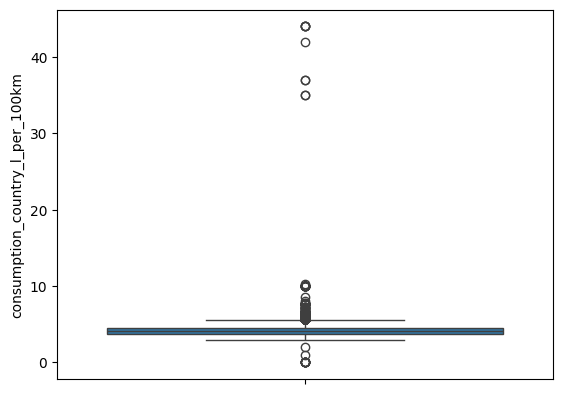

In [625]:
sns.boxplot(df['consumption_country_l_per_100km'])

In [626]:
# Drop original consumption column
df.drop('consumption', axis = 1, inplace = True)

## comfort_convenience column

In [627]:
df.comfort_convenience.value_counts(dropna = False)

comfort_convenience
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                       

In [628]:
def clean_features(value):
    if isinstance(value, list):
        # If the value is already a list, use it as is
        return value
    else:
        # For NaN or other non-string values, return an empty list
        return []
   
df['comfort_convenience_cleaned'] = df['comfort_convenience'].apply(clean_features)

In [629]:
all_features = [feature for sublist in df['comfort_convenience_cleaned'] for feature in sublist]
unique_features = set(all_features)
print(len(unique_features))
# I have a total of 38 unique features, value counts below:
value_counts_comf = pd.DataFrame(all_features).value_counts(dropna = False)

38


In [630]:
df.shape

(15919, 41)

In [631]:
# Use MultiLabelBinarizer to OneHotEncode the features
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
features_encoded = mlb.fit_transform(df['comfort_convenience_cleaned'])
features_df = pd.DataFrame(features_encoded, columns=mlb.classes_, index=df.index)
df = pd.concat([df, features_df], axis=1)

df = df.drop('comfort_convenience', axis = 1)
df = df.drop('comfort_convenience_cleaned', axis = 1)



In [632]:
df.shape

(15919, 77)

In [633]:
# Write a function for filtering One-hot encoded categorical columns with counts <500
def filter_one_hot_columns(df, one_hot_columns, threshold=500): #default threshold value is 500, can modify
    # Sum the values in each one-hot encoded column
    col_counts = df[one_hot_columns].sum(axis=0)
    
    # Identify columns where the count is less than the threshold
    cols_to_drop = col_counts[col_counts < threshold].index.tolist()
    
    # Drop these columns from the DataFrame
    df_filtered = df.drop(columns=cols_to_drop)
    
    return df_filtered

In [634]:
df = filter_one_hot_columns(df, list(unique_features), threshold=500)

In [635]:
df.shape

(15919, 69)

## entertainment_media column

In [636]:
df.entertainment_media.value_counts(dropna = False)

entertainment_media
NaN                                                                                                                          1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                                                             1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                                                         982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]                                              783
[On-board computer, Radio]                                                                                                    487
[Radio]                                                                                                                       477
[Bluetooth, CD player, Hands-free equipment, On-board computer, Radio, USB]                                                   465
[On-board computer]                                                   

In [637]:
# treat same as comfort_convenience column
df['entertainment_media_cleaned'] = df['entertainment_media'].apply(clean_features)

all_features2 = [feature for sublist in df['entertainment_media_cleaned'] for feature in sublist]
unique_features2 = set(all_features2)
print(len(unique_features2))
# I have a total of 10 unique features, value counts below:
value_counts_ent_media = pd.DataFrame(all_features2).value_counts(dropna = False)
value_counts_ent_media

10


0                   
Radio                   11989
On-board computer       11938
Bluetooth               11650
Hands-free equipment     9305
USB                      8158
MP3                      5853
CD player                4791
Sound system             2240
Digital radio            2229
Television                 35
Name: count, dtype: int64

In [638]:
mlb2 = MultiLabelBinarizer()
features_encoded2 = mlb2.fit_transform(df['entertainment_media_cleaned'])
features_df2 = pd.DataFrame(features_encoded2, columns=mlb2.classes_, index=df.index)
df = pd.concat([df, features_df2], axis=1)


In [639]:
# Drop the features with value_counts < 500
df = filter_one_hot_columns(df, list(unique_features2), threshold=500)


In [640]:
# drop the columns not needed any more
df = df.drop(['entertainment_media', 'entertainment_media_cleaned'], axis = 1)

In [641]:
df.head()

make_model  price                                             extras  \
0    Audi A1  15770  [Alloy wheels, Catalytic Converter, Voice Cont...   
1    Audi A1  14500  [Alloy wheels, Sport seats, Sport suspension, ...   
2    Audi A1  14640                      [Alloy wheels, Voice Control]   
3    Audi A1  14500         [Alloy wheels, Sport seats, Voice Control]   
4    Audi A1  16790  [Alloy wheels, Sport package, Sport suspension...   

                                     safety_security previous_owners_cleaned  \
0  [ABS, Central door lock, Daytime running light...                       2   
1  [ABS, Central door lock, Central door lock wit...                     NaN   
2  [ABS, Central door lock, Daytime running light...                       1   
3  [ABS, Alarm system, Central door lock with rem...                       1   
4  [ABS, Central door lock, Driver-side airbag, E...                       1   

  co2emission_cleaned_gCO2/km emissionlabel_cleaned emissionclass_cleaned  \
0                          99                   NaN                     6   
1                         129                 Green                     6   
2                          99                 Green                     6   
3                          99                   NaN                     6   
4                         109                   NaN                     6   

  body_cleaned bodycolor_cleaned  ...  Tinted windows Bluetooth CD player  \
0       Sedans             Black  ...               0         1         0   
1       Sedans               Red  ...               1         1         0   
2       Sedans             Black  ...               0         0         0   
3       Sedans             Brown  ...               0         1         1   
4       Sedans             Black  ...               0         1         1   

   Digital radio Hands-free equipment MP3 On-board computer Radio  \
0              0                    1   0                 1     1   
1              0                    1   0                 1     1   
2              0                    0   1                 1     0   
3              0                    1   1                 1     1   
4              0                    1   1                 1     1   

   Sound system  USB  
0             0    0  
1             1    0  
2             0    0  
3             1    1  
4             0    1  

[5 rows x 77 columns]

## extras column

In [642]:
df.extras.value_counts(dropna = False)

extras
[Alloy wheels]                                                                                                                                            3245
NaN                                                                                                                                                       2962
[Alloy wheels, Touch screen]                                                                                                                               697
[Alloy wheels, Voice Control]                                                                                                                              577
[Alloy wheels, Touch screen, Voice Control]                                                                                                                541
[Alloy wheels, Roof rack]                                                                                                                                  385
[Alloy wheels, Sport seats]            

In [643]:
# treat same as comfort_convenience column
df['extras_cleaned'] = df['extras'].apply(clean_features)

all_features3 = [feature for sublist in df['extras_cleaned'] for feature in sublist]
unique_features3 = set(all_features3)
print(len(unique_features3))
# I have a total of 17 unique features, value counts below:
value_counts_extras = pd.DataFrame(all_features3).value_counts(dropna = False)
value_counts_extras

17


0                  
Alloy wheels           11294
Voice Control           4326
Touch screen            4043
Sport seats             3098
Roof rack               2647
Catalytic Converter     2258
Sport suspension        1619
Sport package           1198
Trailer hitch            654
Shift paddles            508
Cab or rented Car        310
Ski bag                  247
Winter tyres             246
Handicapped enabled       52
Tuned car                 13
Sliding door               3
Right hand drive           3
Name: count, dtype: int64

In [644]:
mlb3 = MultiLabelBinarizer()
features_encoded3 = mlb3.fit_transform(df['extras_cleaned'])
features_df3 = pd.DataFrame(features_encoded3, columns=mlb3.classes_, index=df.index)
df = pd.concat([df, features_df3], axis=1)

df = df.drop(['extras', 'extras_cleaned'], axis = 1)

In [645]:
# Drop the features with value_counts < 500
df = filter_one_hot_columns(df, list(unique_features3), threshold=500)


## safety_security column

In [646]:
df.safety_security.value_counts(dropna = False)

safety_security
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                                       

In [647]:
# treat same as comfort_convenience column
df['safety_security_cleaned'] = df['safety_security'].apply(clean_features)

all_features4 = [feature for sublist in df['safety_security_cleaned'] for feature in sublist]
unique_features4 = set(all_features4)
print(len(unique_features4))
# I have a total of 29 unique features, value counts below:
value_counts_safety_security = pd.DataFrame(all_features4).value_counts(dropna = False)
value_counts_safety_security

29


0                                    
ABS                                      14130
Driver-side airbag                       13902
Power steering                           13599
Passenger-side airbag                    13435
Side airbag                              13203
Electronic stability control             13187
Central door lock                        12707
Isofix                                   11744
Traction control                         11004
Tire pressure monitoring system          10604
Immobilizer                              10499
Daytime running lights                   10412
Fog lights                                8212
LED Daytime Running Lights                5506
Xenon headlights                          3539
Emergency brake assistant                 3151
LED Headlights                            3065
Lane departure warning system             3054
Central door lock with remote control     2397
Head airbag                               2186
Adaptive headlights   

In [648]:
mlb4 = MultiLabelBinarizer()
features_encoded4 = mlb4.fit_transform(df['safety_security_cleaned'])
features_df4 = pd.DataFrame(features_encoded4, columns=mlb4.classes_, index=df.index)
df = pd.concat([df, features_df4], axis=1)

df = df.drop(['safety_security', 'safety_security_cleaned'], axis = 1)

In [649]:
# Drop the features with value_counts < 500
df = filter_one_hot_columns(df, list(unique_features4), threshold=500)

In [650]:
df.shape

(15919, 113)

In [651]:
# Clean column names again before saving
df.columns = df.columns.str.strip().str.lower().str.replace(r'\n','').str.replace('&','_').str.replace(' ','_').str.replace('.','')
sorted(df.columns)

['abs',
 'adaptive_cruise_control',
 'adaptive_headlights',
 'air_conditioning',
 'alarm_system',
 'alloy_wheels',
 'armrest',
 'automatic_climate_control',
 'blind_spot_monitor',
 'bluetooth',
 'body_cleaned',
 'bodycolor_cleaned',
 'catalytic_converter',
 'cd_player',
 'central_door_lock',
 'central_door_lock_with_remote_control',
 'co2emission_cleaned_gco2/km',
 'consumption_city_l_per_100km',
 'consumption_comb_l_per_100km',
 'consumption_country_l_per_100km',
 'countryversion_cleaned',
 'cruise_control',
 'cylinders_cleaned',
 'daytime_running_lights',
 'digital_radio',
 'displacement_cleaned_cc',
 'drivechain_cleaned',
 'driver-side_airbag',
 'driver_drowsiness_detection',
 'electric_tailgate',
 'electrical_side_mirrors',
 'electrically_adjustable_seats',
 'electrically_heated_windshield',
 'electronic_stability_control',
 'emergency_brake_assistant',
 'emergency_system',
 'emissionclass_cleaned',
 'emissionlabel_cleaned',
 'fog_lights',
 'fuel_cleaned',
 'gearingtype_cleaned',
 

In [652]:
df.shape
# df now has 113 columns. That's quite a lot of features! Might be worth doing something like a PCA to reduce the dimensionality of the data

(15919, 113)

In [653]:
# save the cleaned file as .csv file
df.to_csv('data/clean_auto_scout.csv', index=False)
